<a href="https://www.kaggle.com/code/franciscangeno/k-means-practice?scriptVersionId=113176703" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# DATASET
The dataset used throught this notebook is from Kaggle and contains information on percentagres and the number of reported crime cases in different states in the US. I am using Kmeans with Python to group the states into how safe the states are(Clusters depending on levels of safety in the state).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import seaborn as sns
import random
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kmeans-practicing/crime_data.csv


In [2]:
data=pd.read_csv("/kaggle/input/kmeans-practicing/crime_data.csv")

In [3]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data=data.rename(columns={"Unnamed: 0": "State"})

In [5]:
df=data.drop(['State'], axis=1)

In [6]:
# check for null values
df.isnull().mean()

Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

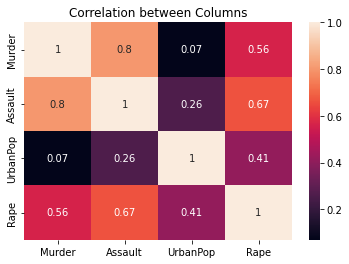

In [7]:
# check for correlation
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between Columns")
plt.show()

<Figure size 1080x432 with 0 Axes>

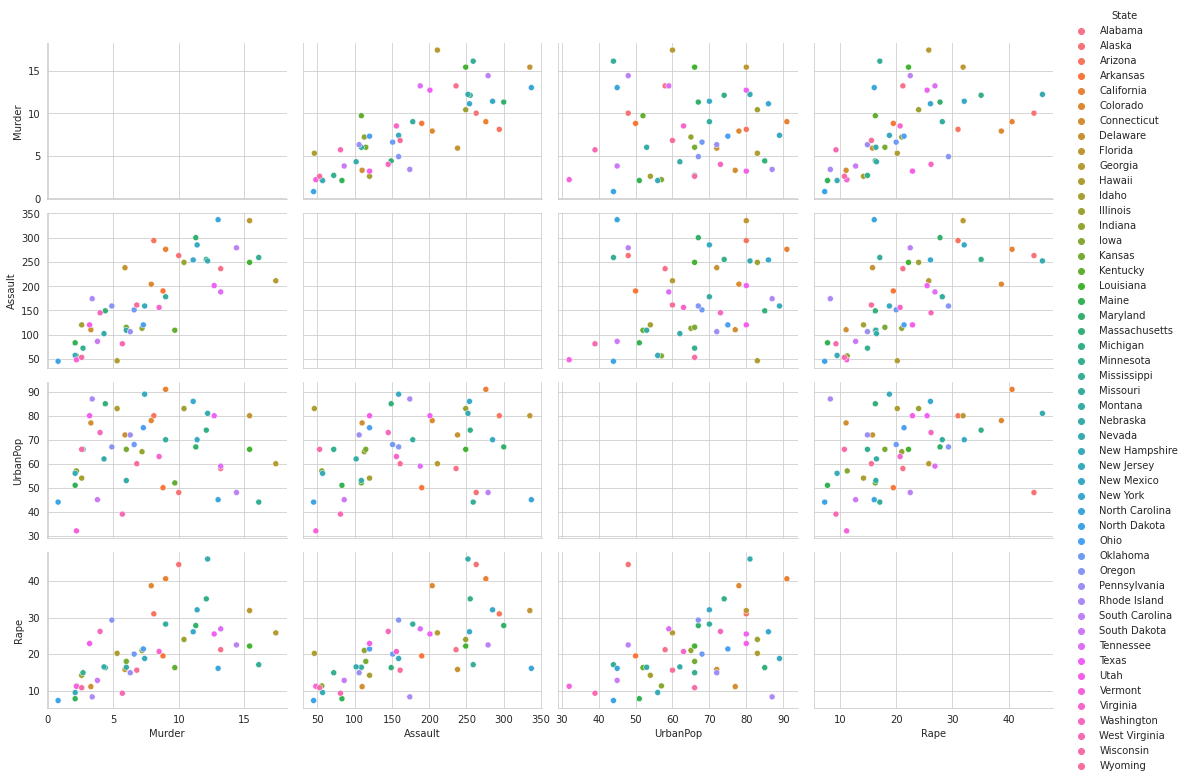

In [8]:
# Let's plot the pairplot for the dataset scattered by Gender
sns.set_style('whitegrid')
plt.figure(1 , figsize = (15 , 6))
sns.pairplot(data, hue='State', aspect=1.5)
plt.show()

We can create six different relationships to cluster the data
* Assault against Murder
* UrbanPop against Murder
* Rape against murder
* Assault against UrbanPop
* Rape against UrbanPop
* Rape against Assault

# **K-Means Clustering**
**Steps To Follow**
 1. Randomly initialise two points , call them centroids.
 2. Go through each of the datapoints in the dataset.
 3. Assign each of the datapoints to a specific centroid depending on whether or not it is close to the centroid.
 4. Take the 2 centroids and move them to the average of the datapoints, coloured the same. 
 5. Repeat till K-Means has converged.



# **1. Clustering Assault With Murder**

In [9]:
PCA_components = ((df-df.min())/(df.max() - df.min())) *9 + 1

In [10]:
PCA_components.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,4.788675,4.876164,6.116271,4.240000
std,2.361421,2.568627,2.208015,2.178229
min,1.000000,1.000000,1.000000,1.000000
25%,2.775602,2.972603,4.432203,2.808140
50%,4.496988,4.513699,6.186441,3.976744
75%,6.665663,7.287671,7.978814,5.389535
max,10.000000,10.000000,10.000000,10.000000


In [11]:
PCA_components.head()

,Murder,Assault,UrbanPop,Rape
0,7.722892,6.886986,4.966102,4.232558
1,5.987952,7.719178,3.440678,9.651163
2,4.957831,8.674658,8.322034,6.511628
3,5.337349,5.469178,3.745763,3.837209
4,5.445783,8.119863,10.000000,8.744186


Text(0, 0.5, 'PCA 2')

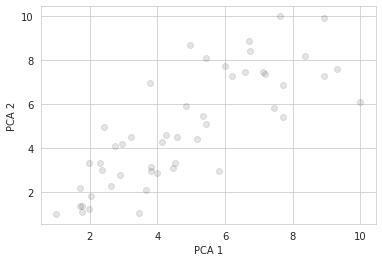

In [12]:
plt.scatter(PCA_components["Murder"], PCA_components["Assault"], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [13]:
PCA_components=PCA_components.values

In [14]:
np.random.seed(42)

# define the euclidian distance of two vectors x1 and x2
def euclidean_distance(x1,x2):
    #return the  sum of squared distances
    return np.sqrt(np.sum((x1-x2)**2))
# kmeans class
class KMeans:
    def __init__(self, K=2, max_iters=100, plot_steps=False):
        # set them
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        #  assign the according sample that belongs to the index to our centroids
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            #  check for convergence (if so, break)
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()
         #   return cluster labels(classify samples as the index of their clusters)
        return self._get_cluster_labels(self.clusters)
    
      #     helper functions 

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            # get the closest centroid and its index
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        #  get the index of the centroid which has the  closest distance      
        #   calculate all the distances
        distances = [euclidean_distance(sample, point) for point in centroids]
        # which is the index with the minimum distance?
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            # now that we have the mean, assign it to the current centroid
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        # iterate over the clusters

        for i, index in enumerate(self.clusters):
            # get the current point
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

[[ 7.72289157  6.8869863 ]
 [ 5.98795181  7.71917808]
 [ 4.95783133  8.67465753]
 [ 5.3373494   5.46917808]
 [ 5.44578313  8.11986301]
 [ 4.84939759  5.90068493]
 [ 2.35542169  3.00342466]
 [ 3.76506024  6.94863014]
 [ 8.91566265  9.93835616]
 [10.          6.11643836]
 [ 3.43975904  1.03082192]
 [ 1.97590361  3.31164384]
 [ 6.20481928  7.28767123]
 [ 4.46987952  3.09589041]
 [ 1.75903614  1.3390411 ]
 [ 3.81927711  3.15753425]
 [ 5.8253012   2.97260274]
 [ 8.91566265  7.28767123]
 [ 1.70481928  2.17123288]
 [ 6.69277108  8.85958904]
 [ 2.95180723  4.20547945]
 [ 7.12650602  7.47260274]
 [ 2.03012048  1.83219178]
 [ 9.29518072  7.59589041]
 [ 5.44578313  5.09931507]
 [ 3.81927711  2.97260274]
 [ 2.89759036  2.75684932]
 [ 7.18072289  7.38013699]
 [ 1.70481928  1.36986301]
 [ 4.57831325  4.51369863]
 [ 6.74698795  8.39726027]
 [ 6.58433735  7.44178082]
 [ 7.61445783 10.        ]
 [ 1.          1.        ]
 [ 4.52409639  3.31164384]
 [ 4.14457831  4.26712329]
 [ 3.22289157  4.51369863]
 

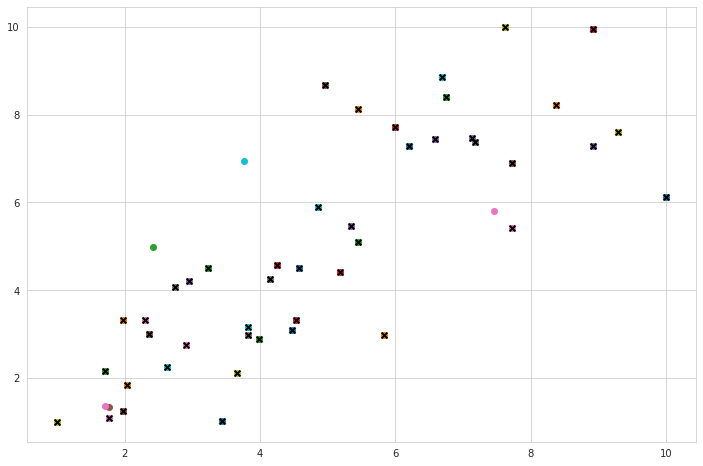

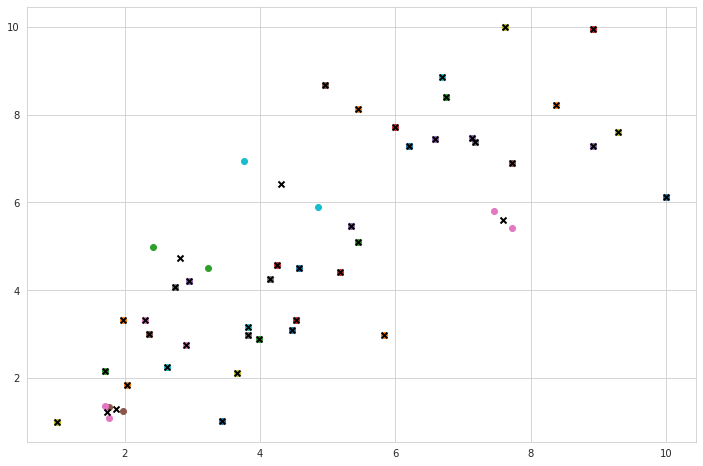

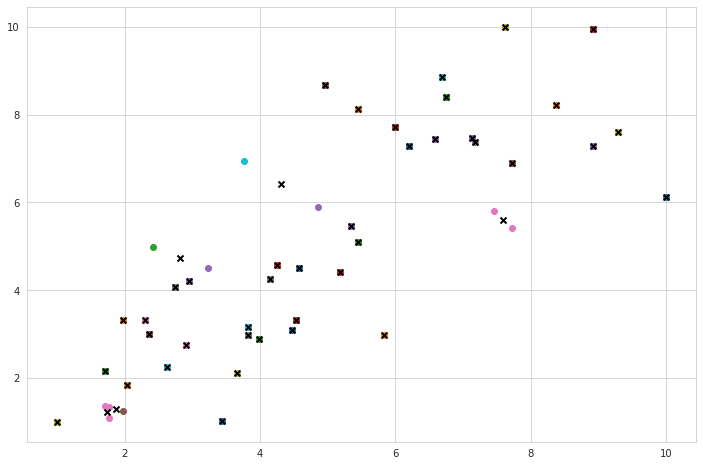

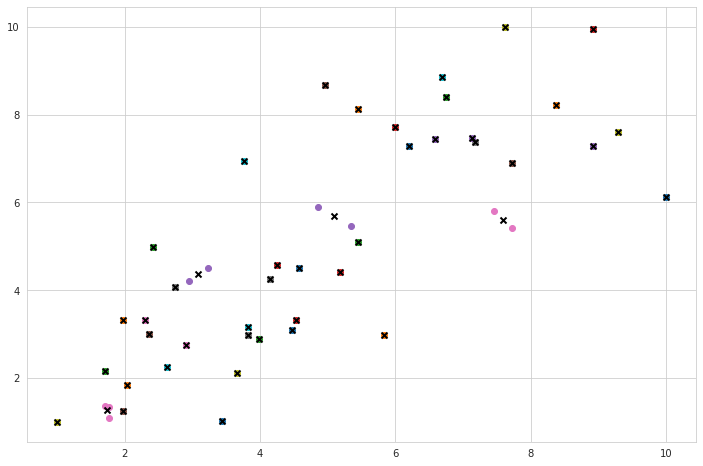

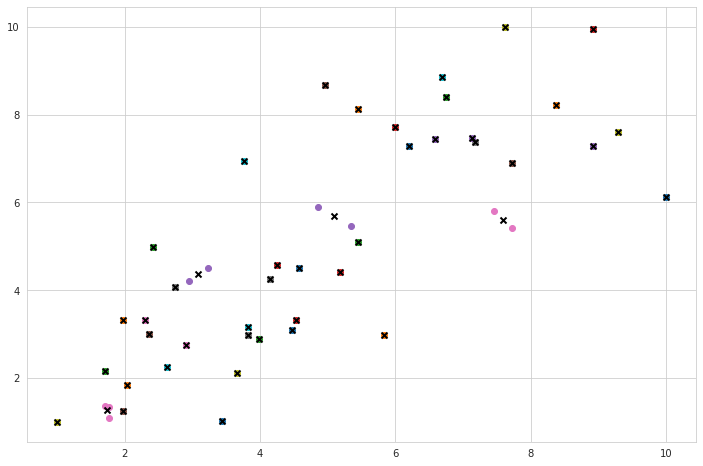

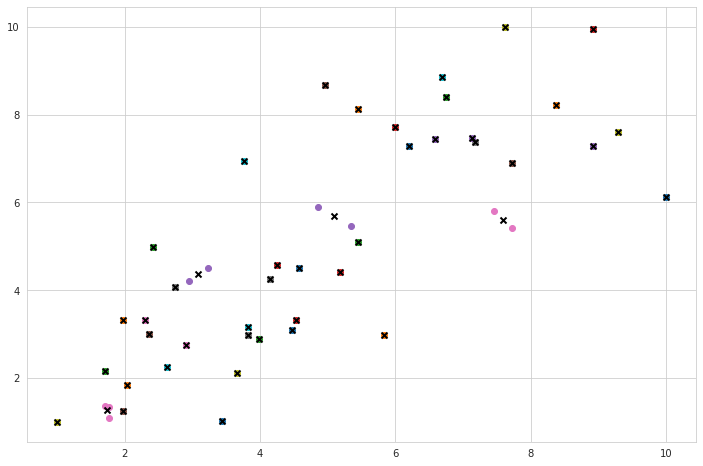

In [15]:
# Testing
if __name__ == "__main__":

    # Convert the dataframe into a NumPy array

    # Assign the features and labels to X and y, respectively
    X = PCA_components[:, 0:2]
    y = PCA_components[:,1]
    print(X)
    # Get the number of clusters from the unique labels in the data
    clusters = len(np.unique(y))

    # Print the number of clusters
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()

# **THE ELBOW METHOD**
Using an arbitrary value of  k results in 50 clusters which does not do much.
I am going to use the elbow method to find k then perform clustering.
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.